In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\heill\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
data = pd.DataFrame()
for year in range(2014,2024):
    df = pd.read_csv(f"c{year}_a.csv")
    df = df[['UNITID', 'CIPCODE', 'MAJORNUM', 'AWLEVEL', 'CTOTALT']]
    df['year'] = year
    data = pd.concat([data, df], axis=0)

In [62]:
summary = data[['year', 'MAJORNUM','CTOTALT']].groupby(['year', 'MAJORNUM']).describe().apply(lambda s: s.apply('{0:.2f}'.format))

In [63]:
totals = summary['CTOTALT'].reset_index()
totals

,year,MAJORNUM,count,mean,std,min,25%,50%,75%,max
0,2014,1,254921.00,38.57,212.63,0.00,1.00,7.00,22.00,25268.00
1,2014,2,38338.00,5.27,31.18,0.00,0.00,1.00,3.00,1878.00
2,2015,1,259698.00,38.14,210.76,0.00,1.00,6.00,21.00,19932.00
3,2015,2,40524.00,5.02,30.27,0.00,0.00,1.00,2.00,1893.00
4,2016,1,260419.00,38.26,213.55,0.00,1.00,6.00,21.00,16242.00
5,2016,2,41565.00,4.92,29.34,0.00,0.00,1.00,2.00,1771.00
6,2017,1,264724.00,38.05,217.05,0.00,1.00,6.00,20.00,14254.00
7,2017,2,44219.00,4.70,29.12,0.00,0.00,0.00,2.00,1778.00
8,2018,1,268284.00,38.19,223.76,0.00,1.00,6.00,20.00,16089.00
9,2018,2,21835.00,9.60,42.17,1.00,1.00,2.00,5.00,1845.00


In [66]:
totals[totals['year'] == 2014]

,year,MAJORNUM,count,mean,std,min,25%,50%,75%,max
0,2014,1,254921.00,38.57,212.63,0.00,1.00,7.00,22.00,25268.00
1,2014,2,38338.00,5.27,31.18,0.00,0.00,1.00,3.00,1878.00


In [67]:
totals[totals['year'] == 2023]

,year,MAJORNUM,count,mean,std,min,25%,50%,75%,max
18,2023,1,282322.00,37.53,240.17,0.00,1.00,5.00,18.00,23973.00
19,2023,2,20970.00,9.53,44.22,1.00,1.00,2.00,5.00,2519.00


In [5]:
# Total completions by year

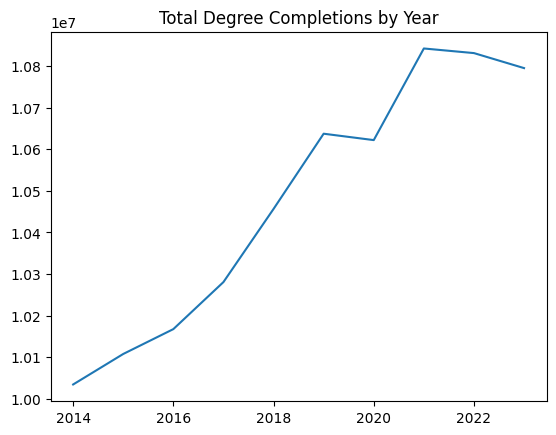

In [6]:
yearly_completions = data.groupby(['year']).sum()
yearly_completions.reset_index(inplace=True)
plt.plot(yearly_completions['year'], yearly_completions['CTOTALT'])
plt.title("Total Degree Completions by Year")
plt.show()

In [11]:
cip_by_year = data.groupby(['year', 'CIPCODE']).sum()
cip_by_year.reset_index(inplace=True)
cip_by_year.sort_values(by=['year', 'CTOTALT'], ascending=False, inplace=True)
cip_by_year = cip_by_year[cip_by_year['CIPCODE'] != 99]
cip_by_year

,year,CIPCODE,UNITID,MAJORNUM,AWLEVEL,CTOTALT
14737,2023,52.0201,1165044433,6152,38440,336268
13909,2023,24.0101,434988796,2398,10600,334324
14709,2023,51.3801,638835199,3010,15031,253629
14207,2023,42.0101,551240000,3551,16782,144496
13910,2023,24.0102,258766253,1331,5955,123210
...,...,...,...,...,...,...
944,2014,46.0505,969864,2,5,0
964,2014,47.0409,107664,1,1,0
985,2014,48.0304,101499,1,1,0
1095,2014,51.0505,604932,2,9,0


In [18]:
#Do a grouped bar chart where each group is a year, and each bar is one of 
top_cips = [52.0201, 24.0101, 51.3801, 42.0101, 24.0102]
completions = []
for cip in top_cips:
    aoi = cip_by_year[cip_by_year['CIPCODE'] == cip]
    values = list(aoi['CTOTALT'])
    values.reverse()
    completions.append(values)

In [ ]:
# Share of all completion by UOA in 2023